<h2 style="color:red" align="center">Predicting if a person would survive in titanic or not  using logistic regression</h2>

**Problem Statement** : Build a machine learning model that can predict person survived
- Q1. Draw a bar plot of survival by sex ? 
- Q2. Draw a bar plot of survival by Pclass ? 
- Q3. Draw a bar plot for survival by SibSp ?
- Q4. Draw a bar plot for survival by Parch ?
- Q5. Draw a bar plot for Survived vs. Cabinbool ?
- Q6. Draw a pie chat showing percentage of survived age wise ?
- Q7. Create a model to predict survived ?
- Q8. Show confusion matrix also show heat map
- Q9. Create classification report ?

In [1]:
import pandas as pd
import numpy as np

In [2]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\abdul\Downloads\PROJECTS\ML PROJECTS\Titanic_survive_Prediction\Data\Titanic_data.csv")

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [8]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
#check for any other unusable values
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Q1. Draw a bar plot of survival by sex ?

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


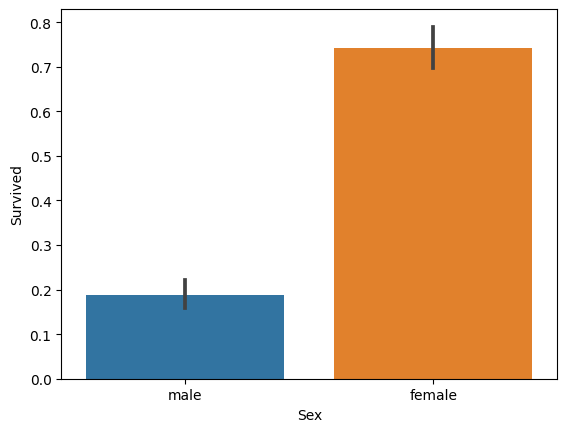

In [10]:

sns.barplot(x="Sex", y="Survived", data=df)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df["Survived"] [df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"] [df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

## Q2.  Draw a bar plot of survival by Pclass ?

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


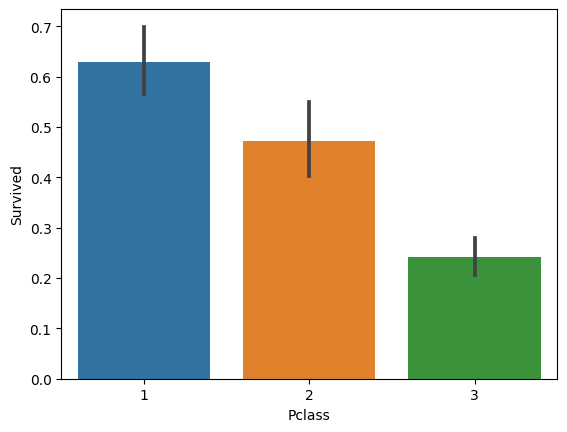

In [11]:

sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)

## Q3. Draw a bar plot for survival by SibSp ?

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


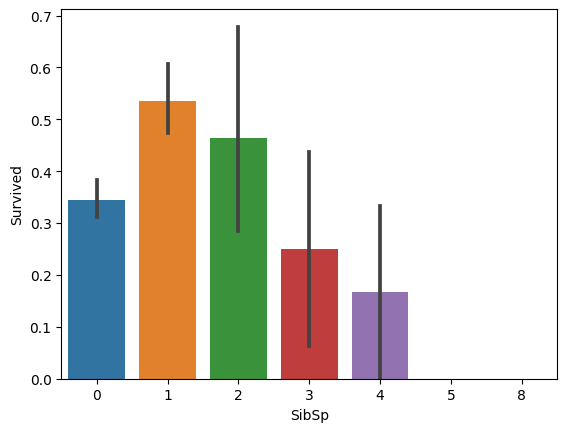

In [12]:

sns.barplot(x="SibSp", y="Survived", data=df)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df["Survived"][df["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df["Survived"][df["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df["Survived"][df["SibSp"] == 2].value_counts(normalize = True)[1]*100)

## Q4. Draw a bar plot for survival by Parch ?

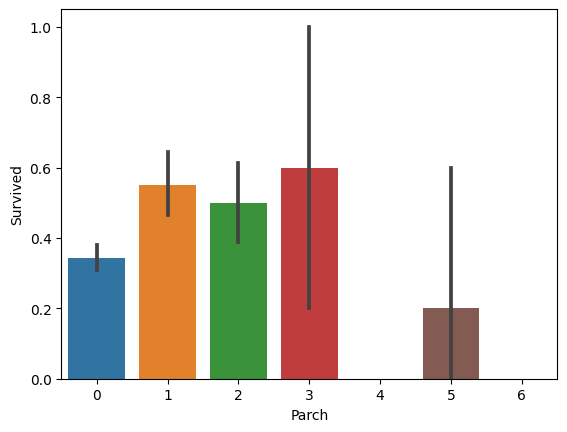

In [13]:
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

## Q5. Draw a bar plot for Survived vs. Cabinbool ?

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


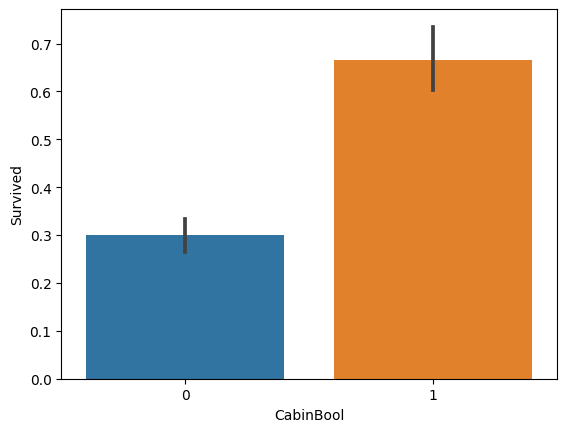

In [14]:
df["CabinBool"] = (df["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", df["Survived"] [df["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", df["Survived"] [df["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=df)
plt.show()

## Q6. Draw a pie chat showing percentage of survived age wise ?

Age Group: 0-20, Survived count: 79, Survived percentage: 48.17%
Age Group: 20-40, Survived count: 150, Survived percentage: 38.76%
Age Group: 40-60, Survived count: 54, Survived percentage: 39.42%
Age Group: 60-80, Survived count: 6, Survived percentage: 24.00%


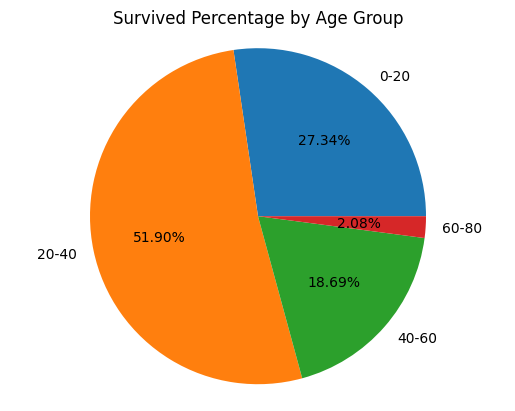

In [15]:
import math

# Sort the DataFrame based on the 'Age' column
df_sorted = df.sort_values('Age')

# Calculate the number of groups based on range of 20 years
group_count = math.ceil(df_sorted['Age'].max() / 20)

# Create bins for the age groups
bins = [i * 20 for i in range(group_count + 1)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(group_count)]

# Assign the age group labels to the DataFrame
df_sorted['Age Group'] = pd.cut(df_sorted['Age'], bins=bins, labels=labels, right=False)

# Calculate the count and percentage of survivors in each age group
survived_counts = df_sorted.groupby('Age Group')['Survived'].sum()
total_counts = df_sorted.groupby('Age Group')['Survived'].count()
survived_percentages = (survived_counts / total_counts) * 100

# Print the results and draw pie chart
for label, count, percentage in zip(labels, survived_counts, survived_percentages):
    print(f"Age Group: {label}, Survived count: {count}, Survived percentage: {percentage:.2f}%")

# Plot the pie chart
plt.pie(survived_counts, labels=labels, autopct='%.2f%%')
plt.title("Survived Percentage by Age Group")
plt.axis('equal')
plt.show()


## Q7. Create a model to predict survived ?

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv(r"C:\Users\abdul\Downloads\PROJECTS\ML PROJECTS\Titanic_survive_Prediction\Data\Titanic_data.csv")


In [20]:
data.shape

(891, 12)

In [21]:
data = data.dropna()

In [22]:
data.shape

(183, 12)

In [23]:
data = data.drop(['Embarked', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [24]:
data['Sex'] = data['Sex'].map({'male': 0,'female': 1})

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived'],axis=1), 
                                                    data['Survived'], test_size=0.20, 
                                                    random_state=8)

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression()

In [29]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
809,810,1,1,33.0,1,0,53.1000
137,138,1,0,37.0,1,0,53.1000
496,497,1,1,54.0,1,0,78.2667
659,660,1,0,58.0,0,2,113.2750
3,4,1,1,35.0,1,0,53.1000


In [30]:
predictions = logmodel.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [31]:
accuracy = logmodel.score(X_test,y_test)
print(accuracy*100,'%')

81.08108108108108 %


## Q8. Show confusion matrix also show heat map

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[10,  5],
       [ 2, 20]], dtype=int64)

Text(20.72222222222222, 0.5, 'Actual')

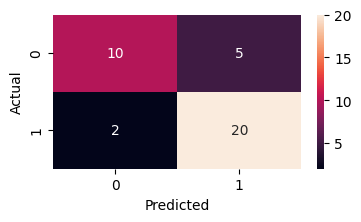

In [33]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,2))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Q9. Create classification report ?

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.80      0.91      0.85        22

    accuracy                           0.81        37
   macro avg       0.82      0.79      0.80        37
weighted avg       0.81      0.81      0.81        37



The END ...